In [1]:
import scanpy
import hdf5plugin
import pandas
import numpy
import anndata
import scipy
import os
import scvelo
import seaborn
import matplotlib
from matplotlib import pyplot

In [6]:
adata_loom = scanpy.read_h5ad("/scratch/lema/m26_losu/velocity_loom.h5ad")
adata_star = scanpy.read_h5ad("/scratch/lema/m26_losu/velocity_star_fdl.h5ad")
adata_list = [adata_loom, adata_star]
adata_names = ["Loom", "STAR"]

Loom


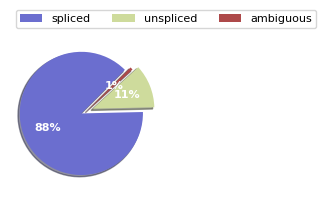

STAR


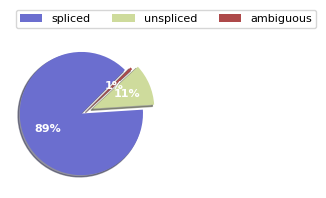

In [7]:
for adata, adata_name in zip(adata_list, adata_names):
    print(adata_name)
    scvelo.pl.proportions(adata)

In [ ]:
# Compare counts for important genes

important_genes = ["Tet1", "Nanog", "Krt8", "Krtdap", "Zfp42", "Dppa4"]

for adata, adata_name in zip(adata_list, adata_names):
    print(adata_name)
    for gene in important_genes:
        print(f"{gene} spliced: {adata[:, gene].layers["spliced"].sum():.1f}, unspliced: {adata[:, gene].layers["unspliced"].sum():.1f}, ambiguous: {adata[:, gene].layers["ambiguous"].sum():.1f}")

Loom
Tet1 spliced: 31019.4, unspliced: 11298.6, ambiguous: 2792.0
Nanog spliced: 8825.2, unspliced: 758.0, ambiguous: 160.0
Krt8 spliced: 103503.2, unspliced: 800.3, ambiguous: 0.0
Krtdap spliced: 74671.3, unspliced: 13916.1, ambiguous: 7438.0
Zfp42 spliced: 69716.4, unspliced: 8764.2, ambiguous: 173.0
Dppa4 spliced: 12843.9, unspliced: 1777.4, ambiguous: 56.0
STAR
Tet1 spliced: 30693.9, unspliced: 12592.8, ambiguous: 2497.0
Nanog spliced: 8991.3, unspliced: 782.7, ambiguous: 162.0
Krt8 spliced: 103175.1, unspliced: 995.3, ambiguous: 0.0
Krtdap spliced: 96581.8, unspliced: 602.1, ambiguous: 282.0
Zfp42 spliced: 66821.0, unspliced: 10318.4, ambiguous: 173.0
Dppa4 spliced: 13810.1, unspliced: 1468.4, ambiguous: 14.0


Unspliced Krtdap counts are missing with STAR

Loom


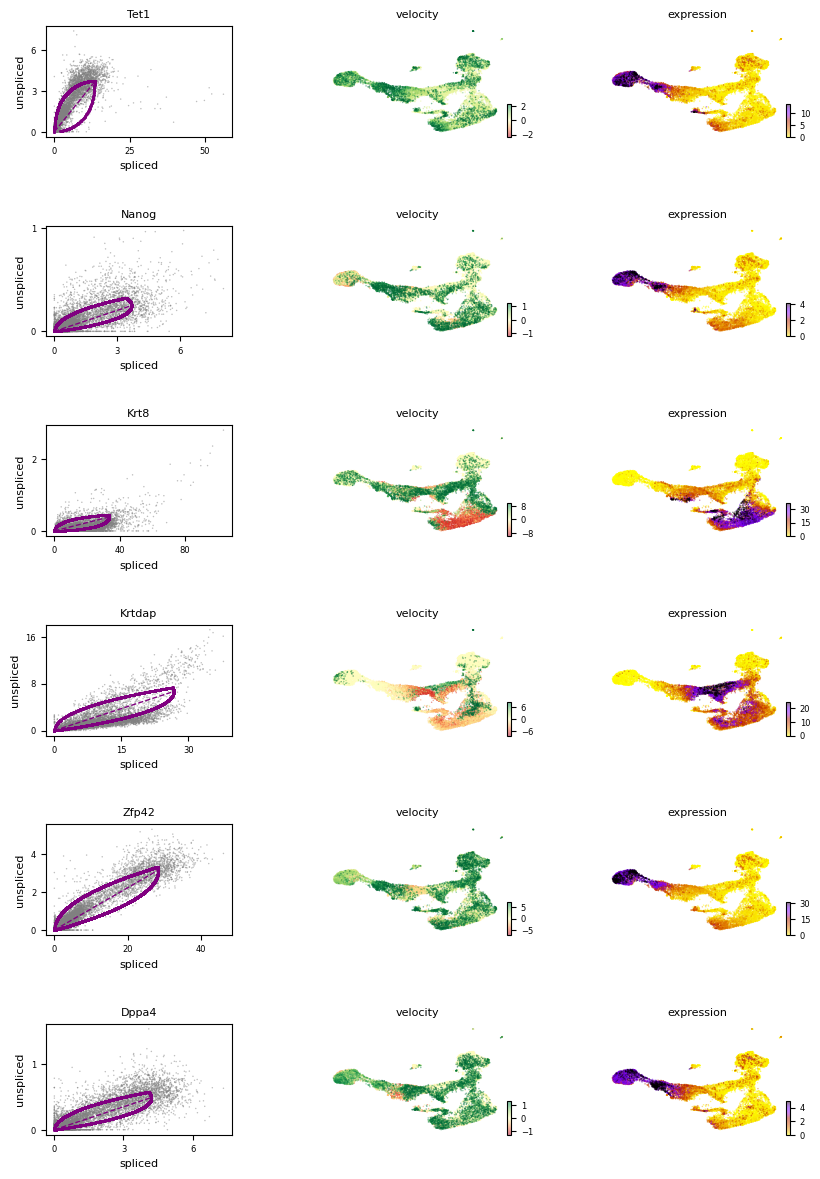

STAR


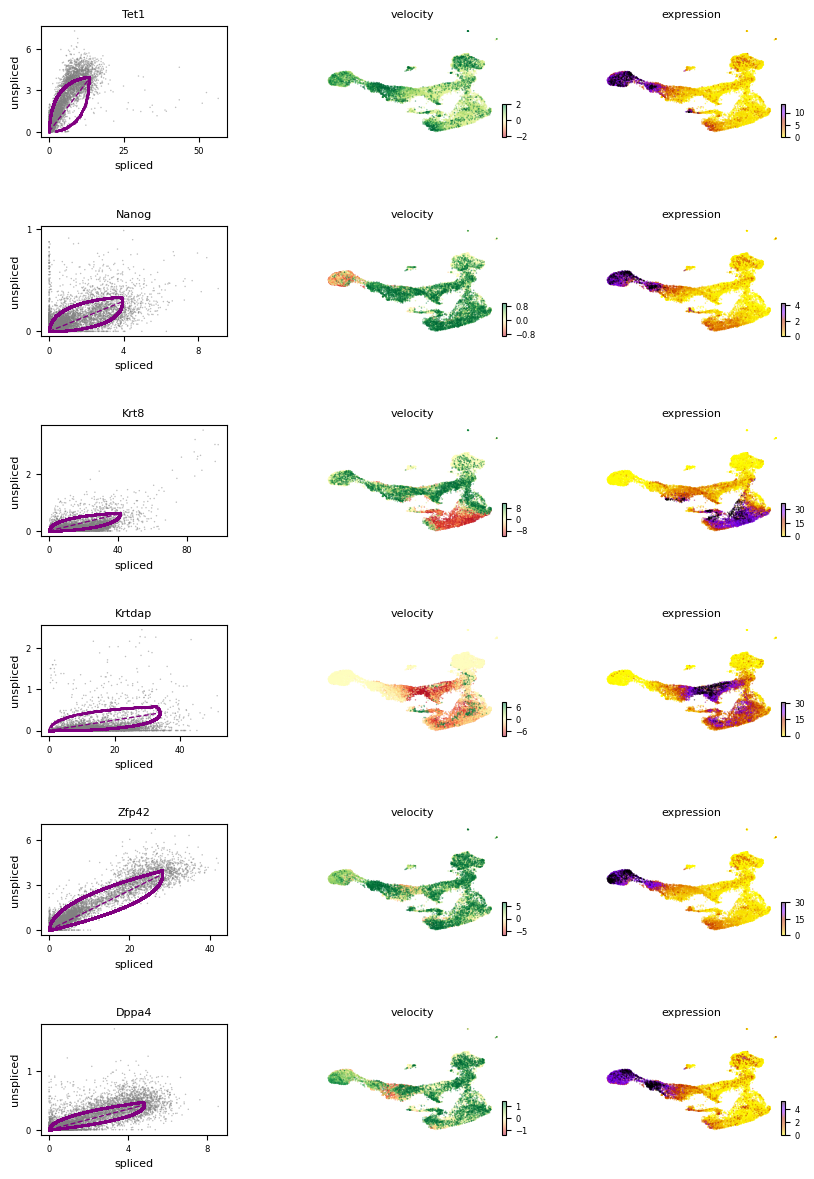

In [ ]:
# Compare velocity

for adata, adata_name in zip(adata_list, adata_names):
    print(adata_name)

    scvelo.pl.velocity(adata, var_names=important_genes)

In [36]:
# Look for genes with large differences in spliced and unspliced counts

gene_names = set(adata_star.var_names) & set(adata_loom.var_names)
unequal_genes = []

for gene in gene_names:
    star_unspliced = adata_star[:, gene].layers["unspliced"].sum()
    loom_unspliced = adata_loom[:, gene].layers["unspliced"].sum()
    unspliced_ratio = star_unspliced/loom_unspliced
    if unspliced_ratio > 2 or unspliced_ratio < 0.5:
        unequal_genes.append(gene)
        spliced_ratio = adata_star[:, gene].layers["spliced"].sum() / adata_loom[:, gene].layers["spliced"].sum()
        print(f"{gene} unspliced ratio: {unspliced_ratio:.4g}, spliced ratio: {spliced_ratio:.4g}, total count: {adata_star[:, gene].layers["spliced"].sum()}")
        # print(f"STAR: spliced: {adata_star[:, gene].layers["spliced"].sum():.1f}, unspliced: {adata_star[:, gene].layers["unspliced"].sum():.1f}, ambiguous: {adata_star[:, gene].layers["ambiguous"].sum():.1f}")
        # print(f"Loom: spliced: {adata_loom[:, gene].layers["spliced"].sum():.1f}, unspliced: {adata_loom[:, gene].layers["unspliced"].sum():.1f}, ambiguous: {adata_loom[:, gene].layers["ambiguous"].sum():.1f}")

print(f"Number of genes with large differences in unspliced counts: {len(unequal_genes)}")

A730063M14Rik unspliced ratio: 5.331, spliced ratio: 0.9412, total count: 635.6979738983935
Cxcl10 unspliced ratio: 0.07569, spliced ratio: 1.015, total count: 21149.972979447317
Hcfc1r1 unspliced ratio: 0.3408, spliced ratio: 1.01, total count: 64511.97966048714
B230369F24Rik unspliced ratio: 4.848, spliced ratio: 0.1757, total count: 77.4428778231532
Crip2 unspliced ratio: 0.491, spliced ratio: 1.006, total count: 138537.04471049848
Atf3 unspliced ratio: 0.3755, spliced ratio: 1.481, total count: 8416.296358941749
Phkg1 unspliced ratio: 7.536, spliced ratio: 1.017, total count: 190.57192324775934
Nsg1 unspliced ratio: 0.1229, spliced ratio: 1.057, total count: 4868.120036022883
Bex3 unspliced ratio: 0.4278, spliced ratio: 1.007, total count: 156672.98200918868
Pdgfrl unspliced ratio: 2.317, spliced ratio: 1.028, total count: 12089.244467818626
Selenom unspliced ratio: 0.2301, spliced ratio: 1.01, total count: 59635.34713705206
H2-M5 unspliced ratio: 0.232, spliced ratio: 1.069, total

In [34]:
# Compare gencode and genbank
gene_names = set(adata_star.var_names) & set(adata_genbank.var_names)
unequal_genes = []

for gene in gene_names:
    star_unspliced = adata_star[:, gene].layers["unspliced"].sum()
    loom_unspliced = adata_genbank[:, gene].layers["unspliced"].sum()
    unspliced_ratio = star_unspliced/loom_unspliced
    if unspliced_ratio > 2 or unspliced_ratio < 0.5:
        unequal_genes.append(gene)
        spliced_ratio = adata_star[:, gene].layers["spliced"].sum() / adata_genbank[:, gene].layers["spliced"].sum()
        print(f"{gene} unspliced ratio: {unspliced_ratio:.4g}, spliced ratio: {spliced_ratio:.4g}, total count: {adata_star[:, gene].layers["spliced"].sum()}")

Gpr15lg unspliced ratio: 2.861, spliced ratio: 1.243, total count: 1186.9118049281474
A730063M14Rik unspliced ratio: 14.55, spliced ratio: 1.51, total count: 635.6979738983935
Eif1ad15 unspliced ratio: inf, spliced ratio: 1.413, total count: 822.1808676524427
Cxcl10 unspliced ratio: 0.03156, spliced ratio: 0.829, total count: 21149.972979447317
Hcfc1r1 unspliced ratio: 2.348, spliced ratio: 0.9403, total count: 64511.97966048714
B230369F24Rik unspliced ratio: inf, spliced ratio: 0.131, total count: 77.4428778231532
Crnde unspliced ratio: 0.4856, spliced ratio: 1.046, total count: 385.87333848584944
Gata2 unspliced ratio: 0.4588, spliced ratio: 0.9158, total count: 1895.6450249974341
Emp1 unspliced ratio: 0.4014, spliced ratio: 0.778, total count: 49881.441416865215
Serpinc1 unspliced ratio: 0.2316, spliced ratio: 7.298, total count: 262.7300277286787
Gm36235 unspliced ratio: 2.405, spliced ratio: 1.529, total count: 50.44961461893426
Tnnt2 unspliced ratio: 0.157, spliced ratio: 0.9128,

KeyboardInterrupt: 

In [ ]:
# Compare with genbank data

adata_genbank = scanpy.read_h5ad("/scratch/lema/m26_losu/splice_counts_genbank.h5ad")

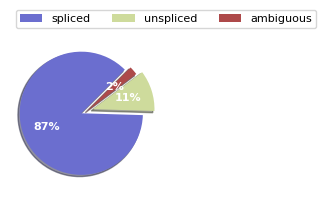

In [22]:
scvelo.pl.proportions(adata_genbank)

In [20]:
for gene in important_genes:
    adata = adata_genbank
    print(f"{gene} spliced: {adata[:, gene].layers["spliced"].sum():.1f}, unspliced: {adata[:, gene].layers["unspliced"].sum():.1f}, ambiguous: {adata[:, gene].layers["ambiguous"].sum():.1f}")

Tet1 spliced: 29106.0, unspliced: 15462.0, ambiguous: 175.0
Nanog spliced: 8956.0, unspliced: 1072.0, ambiguous: 162.0
Krt8 spliced: 117133.0, unspliced: 890.0, ambiguous: 0.0
Krtdap spliced: 119015.0, unspliced: 703.0, ambiguous: 3.0
Zfp42 spliced: 72457.0, unspliced: 13583.0, ambiguous: 882.0
Dppa4 spliced: 14007.0, unspliced: 2161.0, ambiguous: 1.0
